<a href="https://colab.research.google.com/github/hansjang/Py_Radar/blob/main/%EB%8D%B0%EC%8B%B8%EB%9D%BC%EB%A9%B4Part6_P153.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!git clone https://github.com/hansjang/Py_Radar.git

import shutil
shutil.move('Py_Radar/data', '/content/data')

# 폴더와 그 안의 모든 파일을 삭제
# !rm -rf /content/Py_Radar
# !rm -rf /content/data

Cloning into 'Py_Radar'...
remote: Enumerating objects: 175, done.
remote: Counting objects: 100% (9/9), done.
remote: Compressing objects: 100% (9/9), done.
remote: Total 175 (delta 2), reused 0 (delta 0), pack-reused 166 (from 1)
Receiving objects: 100% (175/175), 6.45 MiB | 14.51 MiB/s, done.
Resolving deltas: 100% (88/88), done.


'/content/data'

In [16]:
# 정규방정식 방법
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

df = pd.read_csv('/content/data/insurance.csv')
display(df)

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


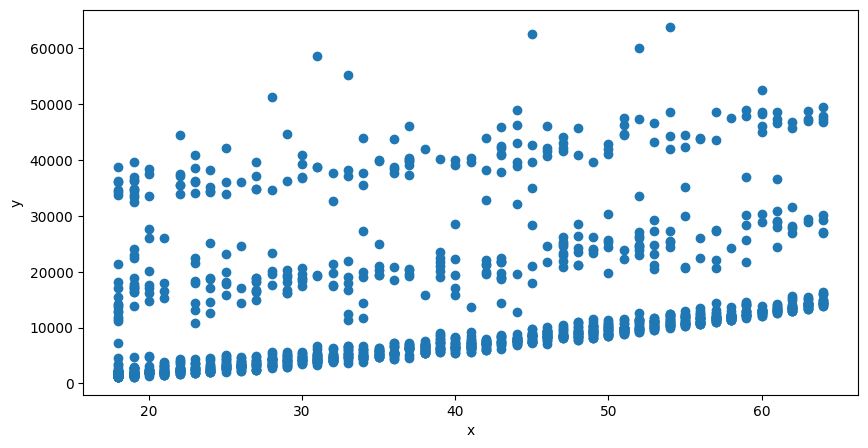

In [20]:
# age => charges
x = df['age']
y = df['charges']

plt.figure(figsize=(10, 5))
plt.scatter(x, y)
plt.xlabel('x')
plt.ylabel('y')
plt.show()

In [22]:
# LinearRegression 에서 .fit()에 입력되는 데이터는 2차원 array 여야 하므로,
# .reshape()로 차원을 맞춰주어야 한다
x = np.array(df['age'])
y = np.array(df['charges'])

# .reshape()로 차원 맞추기
x = x.reshape(1338, 1)
y = y.reshape(1338, 1)

lr = LinearRegression()
lr.fit(x, y)

LinearRegression()

In [12]:
print('선형회귀모델 절편 :', lr.intercept_)
print('선형회귀모델 계수 :', lr.coef_)
# y = 257.7x + 3156.9
print('선형회귀모델 결정계수 : ', lr.score(x, y))
# 0.09

선형회귀모델 절편 : [3165.88500606]
선형회귀모델 계수 : [[257.72261867]]
선형회귀모델 결정계수 :  0.08940589967885804


In [13]:
# 새로운 데이터를 선형회귀모델에 입력한 뒤
# 나이에 따른 의료비용 예측
x_new = [[19], [64]]
y_hat = lr.predict(x_new)
print(y_hat)
# 19세는 보험료 8,062원, 64세는 보험료 19,660원

[[ 8062.61476073]
 [19660.13260074]]


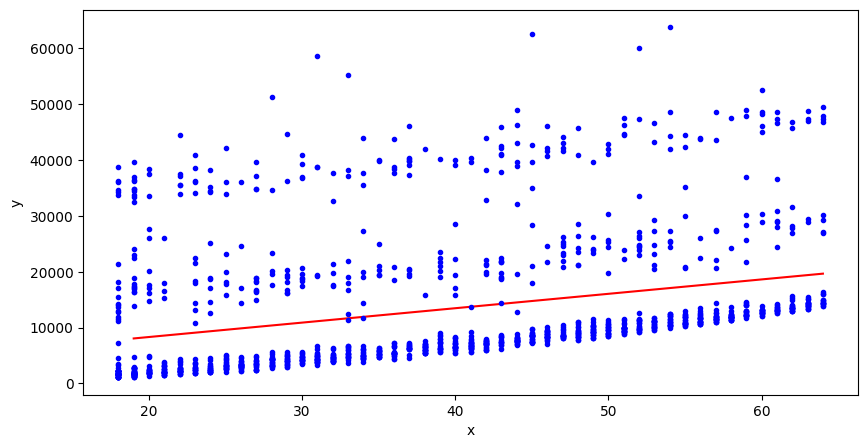

In [15]:
# 회귀선 그리기
plt.figure(figsize=(10, 5))
plt.plot(x_new, y_hat, "-r")
plt.plot(x, y, "b.")
plt.xlabel('x')
plt.ylabel('y')
plt.show()

In [28]:
# 경사하강법
import numpy as np
import pandas as pd
from sklearn.linear_model import SGDRegressor

df = pd.read_csv('/content/data/insurance.csv')
# display(df)

# LinearRegression 에서 .fit()에 입력되는 데이터는 2차원 array 여야 하므로,
# .reshape()로 차원을 맞춰주어야 한다
x = np.array(df['age'])
y = np.array(df['charges'])

# .reshape()로 차원 맞추기
x = x.reshape(1338, 1)
y = y.reshape(1338, 1)

sgd = SGDRegressor(max_iter = 1000, random_state = 45)
sgd.fit(x, y.ravel())

SGDRegressor(random_state=45)

In [34]:
print('선형회귀모델 절편 :', sgd.intercept_)
print('선형회귀모델 계수 :', sgd.coef_)
# y = 727.5x - 399.6
print('선형회귀모델 결정계수 : ', sgd.score(x, y))
# -1.71
# 결정계수가 (-)라는 건 모델이 실제 데이터보다 더 나쁜 예측을 하고 있음을 의미

선형회귀모델 절편 : [-399.62640563]
선형회귀모델 계수 : [727.51535272]
선형회귀모델 결정계수 :  -1.7132507677151763


In [31]:
x_new =[[19], [64]]
y_hat = sgd.predict(x_new)
print(y_hat)
# 19세는 보험료 13,423원, 64세는 보험료 46,161원

[13423.16529614 46161.35616875]


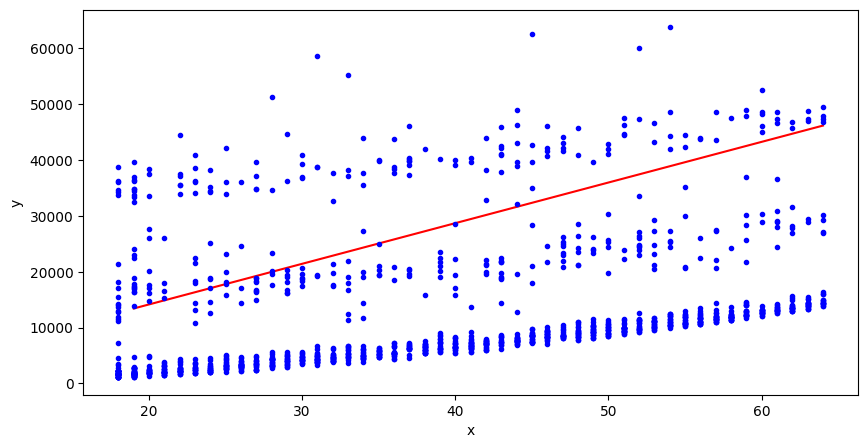

In [35]:
# 회귀선 그리기
plt.figure(figsize=(10, 5))
plt.plot(x_new, y_hat, "-r")
plt.plot(x, y, "b.")
plt.xlabel("x")
plt.ylabel("y")
plt.show()

In [59]:
### 다항 회귀 ###
import numpy as np
import pandas as pd
cereal = pd.read_csv('/content/data/cereal.csv')
cereal.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 77 entries, 0 to 76
Data columns (total 16 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   name      77 non-null     object 
 1   mfr       77 non-null     object 
 2   type      77 non-null     object 
 3   calories  77 non-null     int64  
 4   protein   77 non-null     int64  
 5   fat       77 non-null     int64  
 6   sodium    77 non-null     int64  
 7   fiber     77 non-null     float64
 8   carbo     77 non-null     float64
 9   sugars    77 non-null     int64  
 10  potass    77 non-null     int64  
 11  vitamins  77 non-null     int64  
 12  shelf     77 non-null     int64  
 13  weight    77 non-null     float64
 14  cups      77 non-null     float64
 15  rating    77 non-null     float64
dtypes: float64(5), int64(8), object(3)
memory usage: 9.8+ KB


In [60]:
# 전처리
cereal = df[df.columns[3:]]
cereal = cereal[cereal.sugars >= 0]
cereal.head()

,calories,protein,fat,sodium,fiber,carbo,sugars,potass,vitamins,shelf,weight,cups,rating
0,70,4,1,130,10.0,5.0,6,280,25,3,1.0,0.33,68.402973
1,120,3,5,15,2.0,8.0,8,135,0,3,1.0,1.00,33.983679
2,70,4,1,260,9.0,7.0,5,320,25,3,1.0,0.33,59.425505
3,50,4,0,140,14.0,8.0,0,330,25,3,1.0,0.50,93.704912
4,110,2,2,200,1.0,14.0,8,-1,25,3,1.0,0.75,34.384843


<ipython-input-38-5cca9e3a4e53>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cereal2.sort_values(by=['sugars'], inplace=True)


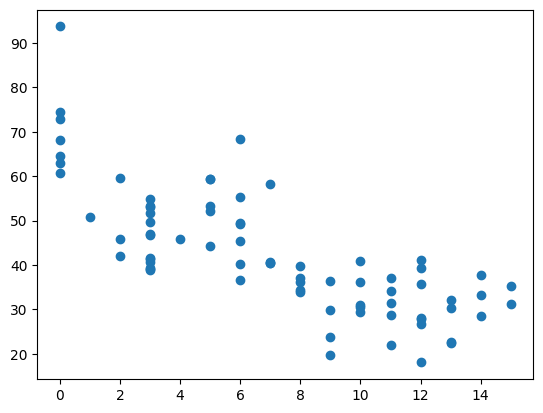

In [38]:
import matplotlib.pyplot as plt
cereal2 = cereal[['sugars', 'rating']]
cereal2.sort_values(by=['sugars'], inplace=True)
cereal2.reset_index(drop=True, inplace=True)
x = cereal2['sugars'].values
y = cereal2['rating'].values
plt.scatter(x,y)
plt.show()

In [40]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x, y,
                                                   test_size = 0.3,
                                                   random_state = 1)
print(X_train.shape, X_test.shape)
print(y_train.shape, y_test.shape)

(53,) (23,)
(53,) (23,)


In [43]:
from sklearn.preprocessing import PolynomialFeatures
poly_reg = PolynomialFeatures(degree=2)
X_poly = poly_reg.fit_transform(X_train.reshape(-1, 1))

from sklearn.linear_model import LinearRegression
reg = LinearRegression()
reg.fit(X_poly, y_train)

LinearRegression()

In [49]:
X_test_poly = poly_reg.transform(X_test.reshape(-1, 1))
pred = reg.predict(X_test_poly)

np.set_printoptions(precision=2)  # 소수점 둘째자리까지 표현
result = np.concatenate((pred.reshape(len(pred), 1), y_test.reshape(len(y_test), 1)), axis=1)
print(result)

[[51.63 46.66]
 [32.1  28.74]
 [55.79 59.64]
 [31.08 37.84]
 [32.1  31.44]
 [44.46 44.33]
 [38.82 40.4 ]
 [41.45 55.33]
 [41.45 49.12]
 [31.38 27.75]
 [36.56 34.38]
 [34.7  29.92]
 [65.25 63.01]
 [33.21 31.07]
 [44.46 52.08]
 [38.82 40.45]
 [51.63 53.13]
 [36.56 33.98]
 [41.45 49.51]
 [31.04 22.74]
 [31.38 39.26]
 [31.5  31.23]
 [32.1  21.87]]


In [50]:
# 모델 예측력 평가
from sklearn.metrics import mean_squared_error, mean_absolute_error
mse = mean_squared_error(y_test, pred)
mae = mean_absolute_error(y_test, pred)
rmse = np.sqrt(mse)
acc = reg.score(poly_reg.transform(X_test.reshape(-1, 1)), y_test)
print('MSE\t{}'.format(round(mse,3)))
print('MAE\t{}'.format(round(mae,3)))
print('RMSE\t{}'.format(round(rmse,3)))
print('ACC\t{}%'.format(round(acc * 100,3)))

MSE	33.565
MAE	4.606
RMSE	5.794
ACC	74.376%


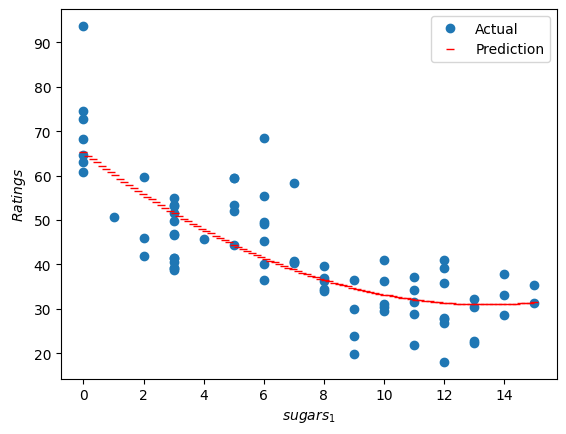

In [51]:
# 회귀분석결과 시각화
X_new = np.linspace(0, 15, 100).reshape(100, 1) # 0부터 15까지의 숫자 100개를 세로로 나열한 2차원 배열을 생성
X_new_poly = poly_reg.transform(X_new)
y_new = reg.predict(X_new_poly)

plt.plot(x, y, 'o', label='Actual')
plt.plot(X_new, y_new, 'r_', label='Prediction')
plt.legend(loc='upper right')
plt.xlabel('$sugars_1$')
plt.ylabel('$Ratings$')
plt.show()

In [69]:
# 고차 다항 회귀 분석연습
# 동일한 시리얼 영양소 평가데이터로 고차 다항 회귀분석을 실시해 보자!
# display(cereal)
# 'rating' 열을 제외한 모든 열 선택
X = cereal.loc[:, cereal.columns != 'rating'].values
# 'rating' 열 선택
y = cereal.loc[:, 'rating'].values

# 데이터 분할
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size = 0.3,
                                                    random_state = 42)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

# 스케일링
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

# 다항변수 변환
from sklearn.preprocessing import PolynomialFeatures
poly_reg = PolynomialFeatures(degree=2)

# 모델 적합
from sklearn.linear_model import LinearRegression
X_train_poly = poly_reg.fit_transform(X_train)
reg = LinearRegression()
reg.fit(X_train_poly, y_train)

# 예측값 생성
X_test_poly = poly_reg.fit_transform(X_test)
pred = reg.predict(X_test_poly)

# 성능 평가
from sklearn.metrics import mean_squared_error, mean_absolute_error
mse = mean_squared_error(y_test, pred)
mae = mean_absolute_error(y_test, pred)
rmse = np.sqrt(mse)
acc = reg.score(X_test_poly, y_test)
print('MSE\t{}'.format(round(mse, 3)))
print('MAE\t{}'.format(round(mae, 3)))
print('RMSE\t{}'.format(round(rmse, 3)))
print('ACC\t{}%'.format(round(acc*100, 3)))

(53, 12) (23, 12) (53,) (23,)
MSE	4.642
MAE	1.704
RMSE	2.155
ACC	97.212%


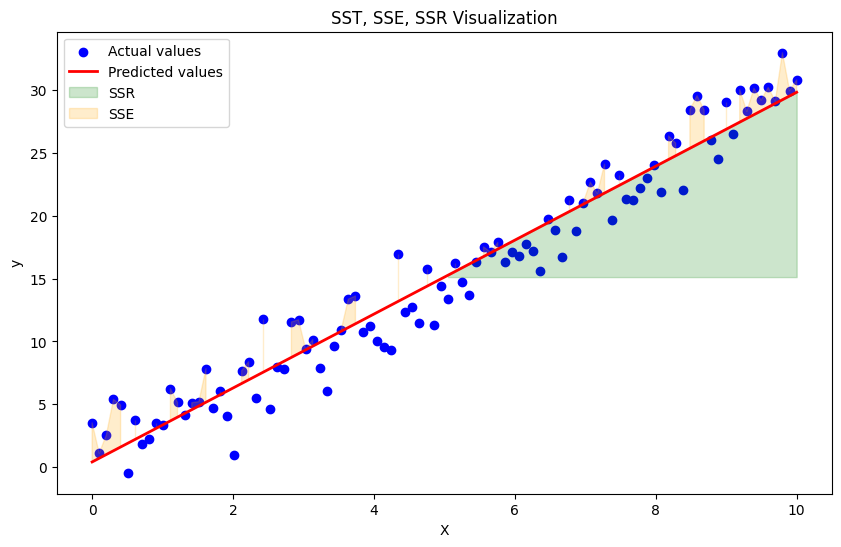

SST (Total Sum of Squares): 7754.51
SSE (Sum of Squared Errors): 403.32
SSR (Sum of Squares for Regression): 7351.19


In [70]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

# 예시 데이터 생성
np.random.seed(0)
X = np.linspace(0, 10, 100).reshape(-1, 1)
y = 3 * X.squeeze() + np.random.randn(100) * 2

# 모델 학습
model = LinearRegression()
model.fit(X, y)
y_pred = model.predict(X)

# SST, SSE, SSR 계산
y_mean = np.mean(y)
SST = np.sum((y - y_mean) ** 2)
SSE = np.sum((y - y_pred) ** 2)
SSR = np.sum((y_pred - y_mean) ** 2)

# 그래프 시각화
plt.figure(figsize=(10, 6))

# 실제 데이터와 예측 값 플로팅
plt.scatter(X, y, color='blue', label='Actual values')
plt.plot(X, y_pred, color='red', label='Predicted values', linewidth=2)

# SST, SSE, SSR 표시
plt.fill_between(X.squeeze(), y_mean, y_pred, where=(y_pred > y_mean), color='green', alpha=0.2, label='SSR')
plt.fill_between(X.squeeze(), y_pred, y, where=(y_pred < y), color='orange', alpha=0.2, label='SSE')

plt.title('SST, SSE, SSR Visualization')
plt.xlabel('X')
plt.ylabel('y')
plt.legend()
plt.show()

# 출력 값 확인
print(f'SST (Total Sum of Squares): {SST:.2f}')
print(f'SSE (Sum of Squared Errors): {SSE:.2f}')
print(f'SSR (Sum of Squares for Regression): {SSR:.2f}')
